# A comparative analysis of the cost and benefits of the UC Davis education.

## Lessons 7 & 8 Notebook: Plotting basics with matplotlib.pyplot

James Sharpnack

In order to run this notebook you will need the national college scorecard dataset which can be found here: https://collegescorecard.ed.gov/data/ (click the download all data link and unzipped it into the data directory).  To quote the data.gov website:

> The College Scorecard is designed to increase transparency, putting the power in the hands of the public — from those choosing colleges to those improving college quality — to see how well different schools are serving their students.

Throughout this study I am interested in the cost of a 4 year degree by school, the type of degree, the future earnings, admissions rate, and the total enrollment of the university.  We will be generally exploring if the common assumptions about the value of a degree-that the highest value degrees are from expensive, private schools with low admissions rates-is true.

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
!ls data/CollegeScorecard_Raw_Data #here are the number of years w data

Crosswalks.zip	      MERGED2002_03_PP.csv  MERGED2009_10_PP.csv
MERGED1996_97_PP.csv  MERGED2003_04_PP.csv  MERGED2010_11_PP.csv
MERGED1997_98_PP.csv  MERGED2004_05_PP.csv  MERGED2011_12_PP.csv
MERGED1998_99_PP.csv  MERGED2005_06_PP.csv  MERGED2012_13_PP.csv
MERGED1999_00_PP.csv  MERGED2006_07_PP.csv  MERGED2013_14_PP.csv
MERGED2000_01_PP.csv  MERGED2007_08_PP.csv  MERGED2014_15_PP.csv
MERGED2001_02_PP.csv  MERGED2008_09_PP.csv  MERGED2015_16_PP.csv


In [4]:
# read in the 2009 data
COL = pd.read_csv('data/CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv')

/home/jsharpna/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
COL.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRYP8_FTNFT,OMENRAP8_FTNFT,OMENRUP8_FTNFT,OMACHT6_PTNFT,OMAWDP6_PTNFT,OMACHT8_PTNFT,OMAWDP8_PTNFT,OMENRYP8_PTNFT,OMENRAP8_PTNFT,OMENRUP8_PTNFT
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Let's describe the dataset
COL.describe()

,UNITID,OPEID6,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,...,OMENRYP8_FTNFT,OMENRAP8_FTNFT,OMENRUP8_FTNFT,OMACHT6_PTNFT,OMAWDP6_PTNFT,OMACHT8_PTNFT,OMAWDP8_PTNFT,OMENRYP8_PTNFT,OMENRAP8_PTNFT,OMENRUP8_PTNFT
count,7.149000e+03,7149.000000,0.0,0.0,0.0,7038.000000,0.0,7149.000000,7149.000000,7149.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,8.797713e+05,14762.266051,NaN,NaN,NaN,1.965331,NaN,0.786264,4.050077,1.870471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.727733e+06,12546.991787,NaN,NaN,NaN,0.886283,NaN,0.409971,11.221270,0.998604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.006540e+05,1002.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.651670e+05,3285.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.154420e+05,10038.000000,NaN,NaN,NaN,2.000000,NaN,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.193140e+05,23610.000000,NaN,NaN,NaN,3.000000,NaN,1.000000,2.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.497000e+07,41552.000000,NaN,NaN,NaN,3.000000,NaN,1.000000,74.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Which columns have no NAs
COL.dropna(axis=1).describe()

,UNITID,OPEID6,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ICLEVEL
count,7.149000e+03,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000
mean,8.797713e+05,14762.266051,0.786264,4.050077,1.870471,2.209120,2.148412,29.093160,4.558959,1.844034
std,3.727733e+06,12546.991787,0.409971,11.221270,0.998604,1.300013,0.843317,16.567915,2.172229,0.808556
min,1.006540e+05,1002.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1.651670e+05,3285.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,3.000000,1.000000
50%,2.154420e+05,10038.000000,1.000000,1.000000,2.000000,2.000000,2.000000,29.000000,5.000000,2.000000
75%,4.193140e+05,23610.000000,1.000000,2.000000,3.000000,4.000000,3.000000,42.000000,6.000000,3.000000
max,4.497000e+07,41552.000000,1.000000,74.000000,4.000000,4.000000,3.000000,78.000000,9.000000,3.000000


In [8]:
COL.shape # size of the dataset

(7149, 1805)

**Dataset description.** We have 1805 variables for 7149 universities (in 2009), many of which are missing, which may be due to the fact that this dataset spans the years 1996-2015 and new variables may have been recorded later in the study.

In [9]:
COL = COL.dropna(axis=1,how='all') #remove those cols with all NAs
COL = COL.set_index('UNITID') # index by the uni ID

In [10]:
COL.shape # how many columns are left

(7149, 1636)

In [11]:
# Let's look for UC Davis
[a for a in COL['INSTNM'] if 'davis' in a.lower()]

['Jefferson Davis Community College',
 'University of California-Davis',
 'Davis College',
 'Davis College',
 'Davis Applied Technology College',
 'Davis & Elkins College']

In [12]:
COL[[('Davis' in a) for a in COL['INSTNM']]] #Let's find davis

,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,...,D150_L4_UNKN,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS
UNITID,,,,,,,,,,,,,,,,,,,,,
101499,102100,1021,Jefferson Davis Community College,Brewton,AL,36426,2.0,1,1,1,...,17.0,139.0,100.0,2.0,6.0,3.0,1234.0,1.0,133.0,NaN
110644,131300,1313,University of California-Davis,Davis,CA,95616-8678,3.0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,24188.0,2.0,130.0,6621.0
194569,2169100,21691,Davis College,Johnson City,NY,13790-2712,3.0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,324.0,1.0,123.0,NaN
202435,485500,4855,Davis College,Toledo,OH,43623,2.0,1,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,485.0,2.0,3.0,NaN
230162,02156600,21566,Davis Applied Technology College,Kaysville,UT,84037-2699,1.0,1,1,1,...,3.0,72.0,4.0,4.0,2.0,17.0,7182.0,1.0,2231.0,NaN
237358,381100,3811,Davis & Elkins College,Elkins,WV,26241-3996,3.0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,580.0,2.0,59.0,NaN


In [13]:
davisID = 110644

In [14]:
COL.head()

,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,...,D150_L4_UNKN,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,100200,1002,Alabama A & M University,Normal,AL,35762,3.0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,4297.0,2.0,13.0,831.0
100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,10369.0,2.0,381.0,6228.0
100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,3.0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,356.0,2.0,NaN,368.0
100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,3.0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,5893.0,2.0,163.0,1562.0
100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,3.0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,4730.0,2.0,NaN,926.0


In [15]:
## I looked for the following variable names 
## in the data dictionary on data.gov
davis_stats = COL.loc[davisID]
print("""
UC Davis Statistics
Admissions rate:{}, Undergrad admissions:{}, 
In-state tuition: {}, Out-of-state tuition: {}, 
Mean earnings 10 yrs after enroll: {}
      """.format(*tuple(davis_stats[['ADM_RATE','UGDS','TUITIONFEE_IN',
                                     'TUITIONFEE_OUT','MN_EARN_WNE_P10']])))


UC Davis Statistics
Admissions rate:0.5257, Undergrad admissions:24496.0, 
In-state tuition: 10003.0, Out-of-state tuition: 32720.0, 
Mean earnings 10 yrs after enroll: 67000
      


In [16]:
colfiles = !ls data/CollegeScorecard_Raw_Data

In [17]:
save_vars = ['UNITID','INSTNM','ADM_RATE','UGDS','TUITIONFEE_IN','TUITIONFEE_OUT','MN_EARN_WNE_P10']

def ret_cols(years):
    """Return an iterator with each read csv"""
    for t in range(len(years)):
        yfname = years[t]
        COLtemp = pd.read_csv("data/CollegeScorecard_Raw_Data/{}".format(yfname),dtype=object)
        COLtemp = COLtemp[COLtemp['HIGHDEG'] == '4'][save_vars] #select graduate degree granting
        COLtemp = COLtemp.set_index('UNITID')
        yield COLtemp, yfname.split("_")[0][-4:]

years = colfiles[1:]
COLiter = ret_cols(years)
TUIT, _ = next(COLiter)
for COLtemp, year in COLiter:
    TUIT = TUIT.join(COLtemp,how='outer',lsuffix=year)

## The rise in tuition

Tuitions have been famously rising for US universities for decades.  I would like to investigate where UC Davis stands in terms of this rise.

In [18]:
TUIT.head()

,INSTNM1997,ADM_RATE1997,UGDS1997,TUITIONFEE_IN1997,TUITIONFEE_OUT1997,MN_EARN_WNE_P101997,INSTNM1998,ADM_RATE1998,UGDS1998,TUITIONFEE_IN1998,...,UGDS2015,TUITIONFEE_IN2015,TUITIONFEE_OUT2015,MN_EARN_WNE_P102015,INSTNM,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,Alabama A & M University,NaN,3852,NaN,NaN,NaN,Alabama A & M University,NaN,3745,NaN,...,4206,9096,16596,NaN,Alabama A & M University,0.6538,4505,9366,17136,NaN
100663,University of Alabama at Birmingham,NaN,9889,NaN,NaN,NaN,University of Alabama at Birmingham,NaN,10181,NaN,...,11383,7510,17062,NaN,University of Alabama at Birmingham,0.6043,11269,7766,17654,NaN
100690,Amridge University,NaN,60,NaN,NaN,NaN,Amridge University,NaN,78,NaN,...,291,6900,6900,NaN,Amridge University,NaN,308,6900,6900,NaN
100706,University of Alabama in Huntsville,NaN,3854,NaN,NaN,NaN,University of Alabama in Huntsville,NaN,4036,NaN,...,5451,9158,21232,NaN,University of Alabama in Huntsville,0.812,5829,9128,20622,NaN
100724,Alabama State University,NaN,4679,NaN,NaN,NaN,Alabama State University,NaN,4453,NaN,...,4811,8720,15656,NaN,Alabama State University,0.4639,4740,8720,15656,NaN


In [19]:
TUIT = TUIT.dropna(axis=1,how='all')

In [20]:
TUIT.head()

,INSTNM1997,UGDS1997,INSTNM1998,UGDS1998,INSTNM1999,UGDS1999,INSTNM2000,UGDS2000,INSTNM2001,TUITIONFEE_IN2001,...,INSTNM2015,ADM_RATE2015,UGDS2015,TUITIONFEE_IN2015,TUITIONFEE_OUT2015,INSTNM,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,Alabama A & M University,3852,Alabama A & M University,3745,Alabama A & M University,3903,Alabama A & M University,4332,Alabama A & M University,4664,...,Alabama A & M University,0.5256,4206,9096,16596,Alabama A & M University,0.6538,4505,9366,17136
100663,University of Alabama at Birmingham,9889,University of Alabama at Birmingham,10181,University of Alabama at Birmingham,9562,University of Alabama at Birmingham,9532,University of Alabama at Birmingham,3363,...,University of Alabama at Birmingham,0.8569,11383,7510,17062,University of Alabama at Birmingham,0.6043,11269,7766,17654
100690,Amridge University,60,Amridge University,78,Amridge University,98,Amridge University,97,Amridge University,NaN,...,Amridge University,NaN,291,6900,6900,Amridge University,NaN,308,6900,6900
100706,University of Alabama in Huntsville,3854,University of Alabama in Huntsville,4036,University of Alabama in Huntsville,4165,University of Alabama in Huntsville,4526,University of Alabama in Huntsville,3112,...,University of Alabama in Huntsville,0.8203,5451,9158,21232,University of Alabama in Huntsville,0.812,5829,9128,20622
100724,Alabama State University,4679,Alabama State University,4453,Alabama State University,4593,Alabama State University,4588,Alabama State University,2520,...,Alabama State University,0.5326,4811,8720,15656,Alabama State University,0.4639,4740,8720,15656


In [21]:
TOP = TUIT[pd.to_numeric(TUIT['UGDS2015']) > 10000] #select those with over 10k UG students

In [22]:
TOP.shape

(252, 91)

In [23]:
intuitnames = [cname for cname in TOP.columns.values if 'TUITIONFEE_IN2' in cname]
outtuitnames = [cname for cname in TOP.columns.values if 'TUITIONFEE_OUT2' in cname]
tuityears = np.arange(2001,2016)

In [24]:
TOP = TOP.drop(labels=[cname for cname in TOP.columns.values if 'INSTNM' in cname],axis=1)

In [25]:
def topmap(x):
    if x=='PrivacySuppressed':
        return None
    return float(x)

TOP = TOP.applymap(topmap)

In [26]:
def tuitplot(tuitnames,tuittitle):
    topiter = TOP[tuitnames].iterrows()
    _, row = next(topiter)
    plt.plot(tuityears,pd.to_numeric(row),'k',alpha=.1,label="Large Unis")
    for _, row in topiter:
        plt.plot(tuityears,pd.to_numeric(row),'k',alpha=.1,label="_nolegend_")
    plt.plot(tuityears,pd.to_numeric(TOP.loc[str(davisID)][tuitnames]),
             'r--',marker='*',label="UC Davis")
    plt.title(tuittitle)
    plt.ylabel('dollars per year')
    plt.legend(loc=2)
    plt.show()

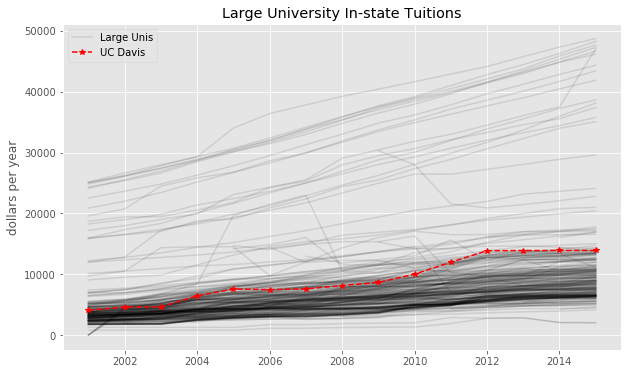

In [32]:
tuitplot(intuitnames,'Large University In-state Tuitions')

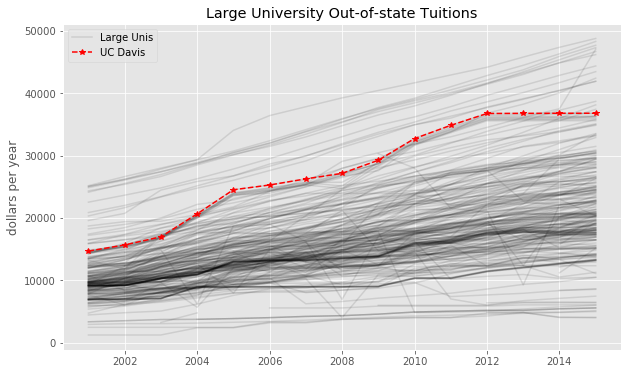

In [33]:
tuitplot(outtuitnames,'Large University Out-of-state Tuitions')

## Error bars around the mean tuition

Error bars indicate that they encapsulate some amount of the distribution of either a statistic or the population.  These can mean very different things and so it is important to be clear about what you are talking about.  See the comments below the error bars.

In [34]:
Y = TOP[outtuitnames].mean(axis=0)
S = TOP[outtuitnames].quantile([.1,.9])

In [35]:
np.array(S)

array([[  6909. ,   7003. ,   7487.2,   8668. ,   9033. ,   9703.2,
         10222.4,   9655.5,  10749.6,  11204.8,  11637.7,  12063.2,
         12371.6,  12690.8,  13228. ],
       [ 14661. ,  15543.6,  17115.9,  19900. ,  21442.8,  22794.2,
         23949.6,  24766.5,  27609.6,  28405.4,  29967.3,  31556. ,
         32963.6,  33871.6,  34965. ]])

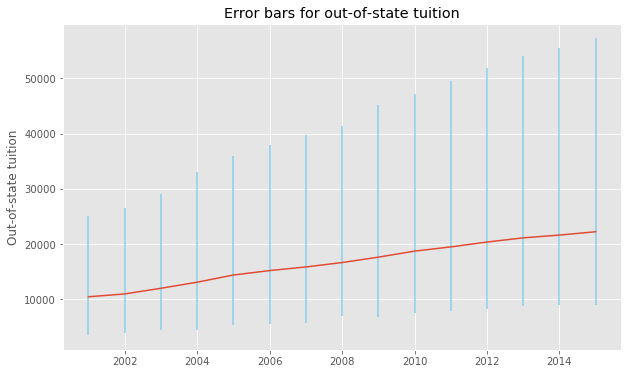

In [36]:
plt.errorbar(tuityears,Y,yerr=np.array(S),ecolor="#87CEEB")
plt.ylabel('Out-of-state tuition')
plt.title('Error bars for out-of-state tuition')
plt.show()

The out of state tuition with error bars spanning 10th to 90th percentiles, the mean is shown in red.

In [37]:
TOP = TUIT[TUIT['UGDS'].map(float) > 10000]
MID = TUIT[(TUIT['UGDS'].map(float) > 2000) & (TUIT['UGDS'].map(float) <= 10000)]
LOW = TUIT[TUIT['UGDS'].map(float) <= 2000]

In [38]:
print(TOP.shape, MID.shape, LOW.shape)

(250, 91) (621, 91) (882, 91)


In [39]:
Ytop = TOP[outtuitnames].applymap(float).mean(axis=0)
Ymid = MID[outtuitnames].applymap(float).mean(axis=0)
Ylow = LOW[outtuitnames].applymap(float).mean(axis=0)

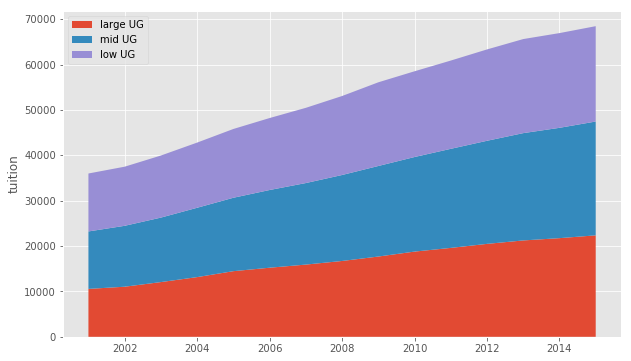

In [40]:
plt.stackplot(tuityears,Ytop,Ymid,Ylow,labels=['large UG','mid UG','low UG'])
plt.ylabel('tuition')
plt.legend(loc=2)
plt.show()

While this stackplot looks quite nice, it makes no sense.  Why would you stack the mean of tuitions between large, mid, and low size undergrads.  Is there any situation in which a typical large school tuition gets added to a mid size tuition, not likely.

## Looking at earnings trends with scatterplots

I would like to devote some time to understanding the trends in mean earnings as a function of tuition and school size. 

In [41]:
TUIT.columns.values

array(['INSTNM1997', 'UGDS1997', 'INSTNM1998', 'UGDS1998', 'INSTNM1999',
       'UGDS1999', 'INSTNM2000', 'UGDS2000', 'INSTNM2001',
       'TUITIONFEE_IN2001', 'TUITIONFEE_OUT2001', 'INSTNM2002',
       'ADM_RATE2002', 'UGDS2002', 'TUITIONFEE_IN2002',
       'TUITIONFEE_OUT2002', 'INSTNM2003', 'ADM_RATE2003', 'UGDS2003',
       'TUITIONFEE_IN2003', 'TUITIONFEE_OUT2003', 'INSTNM2004',
       'ADM_RATE2004', 'UGDS2004', 'TUITIONFEE_IN2004',
       'TUITIONFEE_OUT2004', 'INSTNM2005', 'ADM_RATE2005', 'UGDS2005',
       'TUITIONFEE_IN2005', 'TUITIONFEE_OUT2005', 'INSTNM2006',
       'ADM_RATE2006', 'UGDS2006', 'TUITIONFEE_IN2006',
       'TUITIONFEE_OUT2006', 'INSTNM2007', 'ADM_RATE2007', 'UGDS2007',
       'TUITIONFEE_IN2007', 'TUITIONFEE_OUT2007', 'INSTNM2008',
       'ADM_RATE2008', 'UGDS2008', 'TUITIONFEE_IN2008',
       'TUITIONFEE_OUT2008', 'MN_EARN_WNE_P102008', 'INSTNM2009',
       'ADM_RATE2009', 'UGDS2009', 'TUITIONFEE_IN2009',
       'TUITIONFEE_OUT2009', 'INSTNM2010', 'ADM_RATE2

In [42]:
TVE = TUIT[['UGDS2014','TUITIONFEE_IN2014','MN_EARN_WNE_P102014']].dropna(axis=0).applymap(topmap)
DAV = TUIT.loc[str(davisID),['UGDS2014','TUITIONFEE_IN2014','MN_EARN_WNE_P102014']].map(topmap)

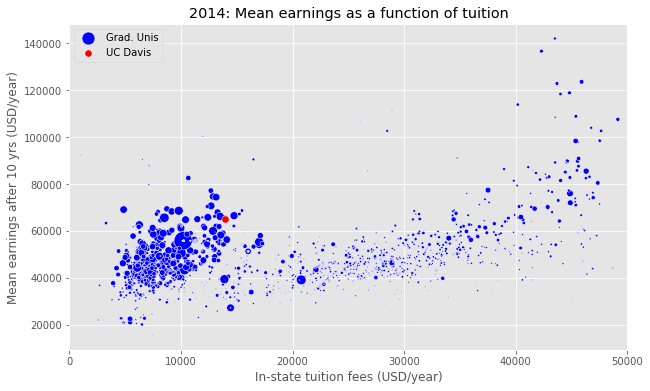

In [51]:
#TVE = TVE[TVE['mn_earn_wne_p10']!='PrivacySuppressed']

plt.scatter(TVE.iloc[:,1],TVE.iloc[:,2],s=TVE.iloc[:,0]/500,
            c='b',edgecolors='w',label='Grad. Unis')
plt.scatter([DAV[1]],[float(DAV[2])],s=[DAV[0]/500],c='r',edgecolors='w', label='UC Davis')
plt.xlim([0,50000])
plt.xlabel('In-state tuition fees (USD/year)')
plt.ylabel('Mean earnings after 10 yrs (USD/year)')
plt.title('2014: Mean earnings as a function of tuition')
_ = plt.legend(loc=2)
#plt.show()

In the above plot the scatter points are sized such that the area is proportional to the undergraduate enrollment for the university.  Recall that this is only universities that grant graduate degrees.  It seems there are two populations (likely between public and private universities) such that the mean earnings as a proportion of tuition is higher in the left population and on the right population has a smaller proportion but some of the universities have significantly higher mean earnings.  UC Davis seems to be consistent with this trend in the left population.

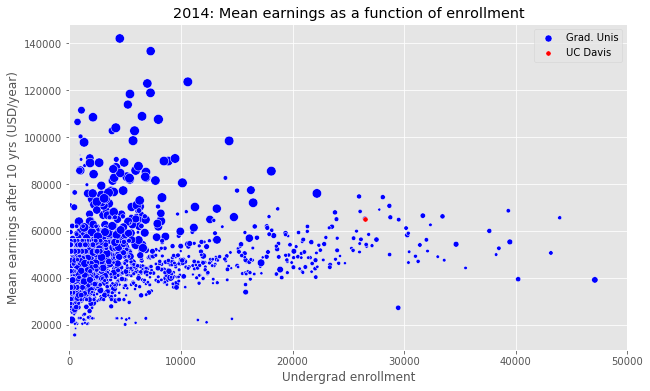

In [52]:
plt.scatter(TVE.iloc[:,0],TVE.iloc[:,2],s=TVE.iloc[:,1]/500,
            c='b',edgecolors='w',label='Grad. Unis')
plt.scatter([DAV[0]],[float(DAV[2])],s=[DAV[1]/500],c='r',edgecolors='w', label='UC Davis')
plt.xlim([0,50000])
plt.xlabel('Undergrad enrollment')
plt.ylabel('Mean earnings after 10 yrs (USD/year)')
plt.title('2014: Mean earnings as a function of enrollment')
plt.legend(loc=1)
_ = plt.legend

The mean earnings as a function of undergrad enrollment, where the area of the scatterplots is proportional to the tuition cost.

In [49]:
DAV

UGDS2014               26483.0
TUITIONFEE_IN2014      13895.0
MN_EARN_WNE_P102014    65200.0
Name: 110644, dtype: float64

## Other comparisons

In this section, we will look at the distribution of in-state tuition, the enrollment of the UC campuses, the distribution of admittance as a function of degree type.

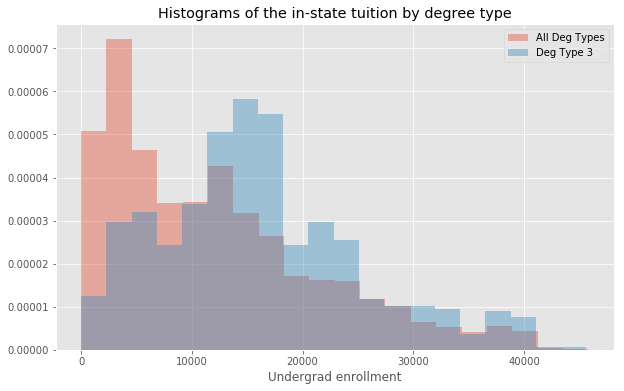

In [58]:
plt.hist(COL['TUITIONFEE_IN'].dropna(),bins=20,alpha=.4,label='All Deg Types',normed=True)
plt.hist(COL[COL['HIGHDEG'] == 3]['TUITIONFEE_IN'].dropna(),
         bins=20,alpha=.4,label='Deg Type 3',normed=True)
plt.title('Histograms of the in-state tuition by degree type')
plt.xlabel('Undergrad enrollment')
plt.legend()
plt.show()

In [61]:
import wordcloud

In [67]:
[a[1:] for a in calenroll.itertuples()]

[('University of California-Berkeley', 25529.0),
 ('University of California-Davis', 24496.0),
 ('University of California-Irvine', 22211.0),
 ('University of California-Los Angeles', 26687.0),
 ('University of California-Riverside', 16988.0),
 ('University of California-San Diego', 23121.0),
 ('University of California-Santa Barbara', 19793.0),
 ('University of California-Santa Cruz', 15259.0),
 ('University of California-Merced', 3190.0)]

In [72]:
wc = wordcloud.WordCloud(background_color="white")
cal = ['university of california-' in a.lower() for a in COL['INSTNM']]
calenroll = COL[cal][['INSTNM','UGDS']].dropna()
wc.fit_words({a[1]:a[2] for a in calenroll.itertuples()})

(-0.5, 399.5, 199.5, -0.5)

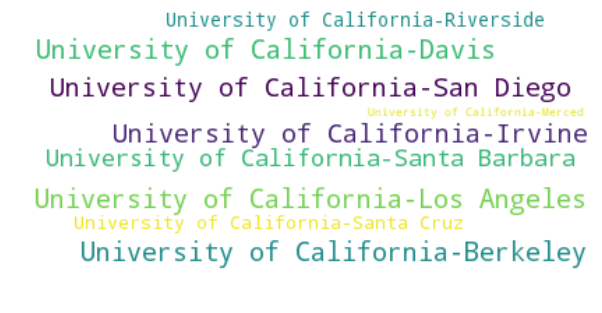

In [73]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

A word cloud of the UC campuses based on the enrollment (the larger words correspond to the undergrad enrollment).

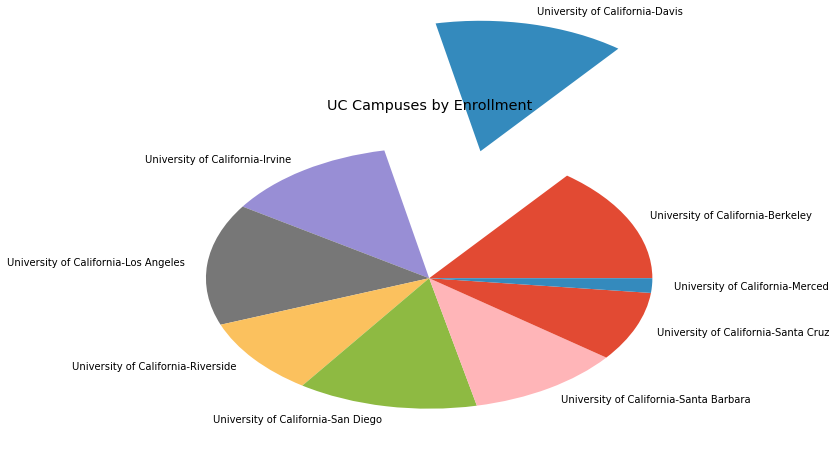

In [82]:
expl = [0]*len(calenroll)
expl[1]=1
plt.pie(calenroll['UGDS'],labels=calenroll['INSTNM'],explode=expl,shadow=False)
plt.title('UC Campuses by Enrollment')
plt.show()

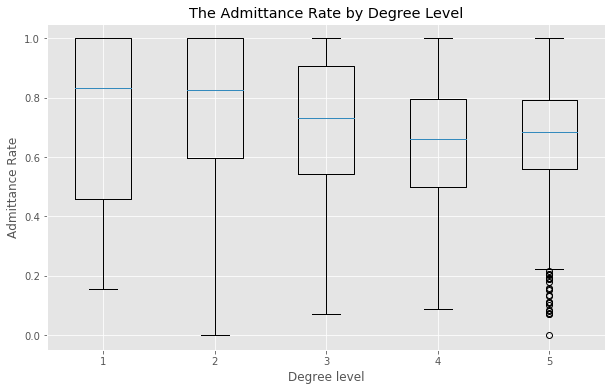

In [84]:
adm = [X['ADM_RATE'].dropna() for deg, X in COL.groupby('HIGHDEG')]
plt.boxplot(adm)
plt.xlabel('Degree level')
plt.ylabel('Admittance Rate')
plt.title('The Admittance Rate by Degree Level')
plt.show()

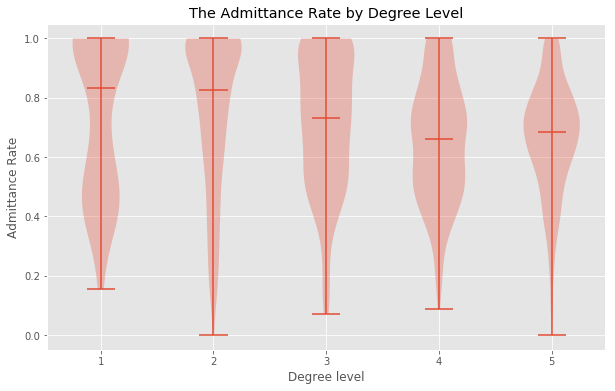

In [85]:
adm = [X['ADM_RATE'].dropna() for deg, X in COL.groupby('HIGHDEG')]
plt.violinplot(adm,showmedians=True)
plt.xlabel('Degree level')
plt.ylabel('Admittance Rate')
plt.title('The Admittance Rate by Degree Level')
plt.show()

In [86]:
COL.loc[davisID]['ADM_RATE']

0.52569999999999995

<h2>Subplots</h2> Here is an example of how subplots work.

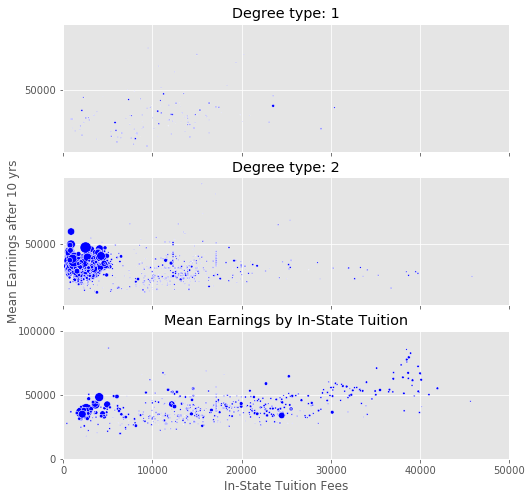

In [87]:
f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(8,8))
TVE = COL[['UGDS','TUITIONFEE_IN','MN_EARN_WNE_P10','HIGHDEG']].dropna(axis=0)
TVE = TVE[TVE['MN_EARN_WNE_P10']!='PrivacySuppressed']
for i in range(3):
    TVEt = TVE[TVE['HIGHDEG'] == i+1]
    axarr[i].scatter(TVEt.iloc[:,1],TVEt.iloc[:,2],s=TVEt.iloc[:,0]/300,
                     c='b',edgecolors='white')
    axarr[i].set_xlim([0,50000])
    axarr[i].set_yticks([0,50000,100000])
    axarr[i].set_title('Degree type: ' + str(i+1))
    if i == 1:
        axarr[i].set_ylabel('Mean Earnings after 10 yrs')
#f.subplots_adjust(hspace=0)
plt.xlabel('In-State Tuition Fees')
plt.title('Mean Earnings by In-State Tuition')
plt.savefig('earningsbytuition.png',format='png')
plt.show()